In [1]:
import pandas as pd

df = pd.read_csv('knn.csv')
x1 = df['x1']
x2 = df['x2']
y = df['y']

dis = pd.DataFrame(columns=['distance', 'category'])
a = dis['distance']
b = dis['category']
q=[3,7]
for i in range(10):
    dist = ((q[0] - x1[i])**2 + (q[1] - x2[i])**2)**0.5
    a.loc[i] = dist
    b.loc[i] = y[i]

dis['distance']=a
dis['category']=b


In [2]:
dis

,distance,category
0,4.000000,bad
1,5.000000,bad
2,3.000000,good
3,3.605551,good
4,2.236068,bad
5,2.000000,good
6,1.414214,bad
7,5.000000,bad
8,4.472136,good
9,5.099020,bad


In [3]:
dis.sort_values(by='distance')

,distance,category
6,1.414214,bad
5,2.000000,good
4,2.236068,bad
2,3.000000,good
3,3.605551,good
0,4.000000,bad
8,4.472136,good
1,5.000000,bad
7,5.000000,bad
9,5.099020,bad


In [4]:
dis = dis.reset_index(drop=True)

In [5]:
dis

,distance,category
0,4.000000,bad
1,5.000000,bad
2,3.000000,good
3,3.605551,good
4,2.236068,bad
5,2.000000,good
6,1.414214,bad
7,5.000000,bad
8,4.472136,good
9,5.099020,bad


In [6]:
#when k=2
k=2
d=dis['distance']
c=dis['category']
g=b=0
for i in range(k):
    if c[i]=='good':
        g+=1
    else:
        b+=1
if b>=g:
    print('category=bad')
elif b>g:
    print('category=good')
    
    

category=bad


In [7]:
#when k=2
k=3
d=dis['distance']
c=dis['category']
g=b=0
for i in range(k):
    if c[i]=='good':
        g+=1
    else:
        b+=1
if b>=g:
    print('category=bad')
elif b>g:
    print('category=good')
    
    

category=bad


In [8]:
#when k=2
k=4
d=dis['distance']
c=dis['category']
g=b=0
for i in range(k):
    if c[i]=='good':
        g+=1
    else:
        b+=1
if b>=g:
    print('category=bad')
elif b>g:
    print('category=good')
    
    

category=bad


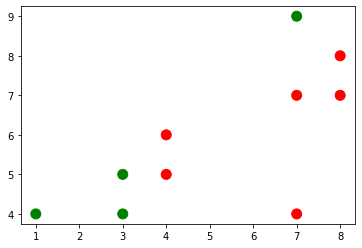

In [9]:
import matplotlib.pyplot as plt
colors = ['red' if y == 'bad' else 'green' for y in df['y']]
plt.scatter(df['x1'], df['x2'], c=colors, s=100)

In [10]:
def convert_y_to_0_1(y):
    y_converted = pd.Series()
    for i in range(len(y)):
        if y.iloc[i] == 'good':
            y_converted.loc[i] = 0
        else:
            y_converted.loc[i] = 1

    return y_converted
df['y'] = convert_y_to_0_1(df['y'])
y_train=df['y']

/tmp/ipykernel_4881/841870068.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_converted = pd.Series()


In [11]:
from sklearn.neighbors import KNeighborsClassifier
X_train=df[['x1','x2']].to_numpy().reshape(-1,2)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
x_new=[[3,7]]
predicted_class = knn.predict(x_new)
if predicted_class[0]==1 :
    print('bad')
else:
    print('good')

bad


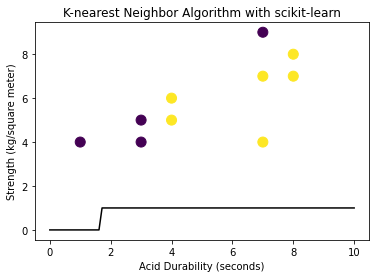

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier object.
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the KNeighborsClassifier object to the training data.
knn.fit(X_train, y_train)

# Calculate the decision boundary.
decision_boundary_x = np.linspace(0, 10, 100).reshape(-1, 1)  # Reshape to a column vector
decision_boundary_y = knn.predict(np.c_[decision_boundary_x, np.full_like(decision_boundary_x, 7)])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100)


plt.plot(decision_boundary_x, decision_boundary_y, c='black')

plt.xlabel('Acid Durability (seconds)')
plt.ylabel('Strength (kg/square meter)')

plt.title('K-nearest Neighbor Algorithm with scikit-learn')

plt.show()
